<a href="https://colab.research.google.com/github/zychang2/CS6476-Final-Project/blob/main/CSProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV Project Notebook


## Do these first because restart runtime needed

In [ ]:
!pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 24.3 MB/s eta 0:00:00


In [ ]:
!sudo apt install fuse3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following package was automatically installed and is no longer required:
  libfuse2
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libfuse3-3
The following packages will be REMOVED:
  fuse
The following NEW packages will be installed:
  fuse3 libfuse3-3
0 upgraded, 2 newly installed, 1 to remove and 39 not upgraded.
Need to get 106 kB of archives.
After this operation, 264 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfuse3-3 amd64 3.10.5-1build1 [81.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fuse3 amd64 3.10.5-1build1 [24.7 kB]
Fetched 106 kB in 0s (234 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 

In [ ]:
!wget https://downloads.rclone.org/v1.66.0/rclone-v1.66.0-linux-amd64.deb
!apt install ./rclone-v1.66.0-linux-amd64.deb

--2024-03-22 22:31:32--  https://downloads.rclone.org/v1.66.0/rclone-v1.66.0-linux-amd64.deb
Resolving downloads.rclone.org (downloads.rclone.org)... 95.217.6.16, 2a01:4f9:c012:7154::1
Connecting to downloads.rclone.org (downloads.rclone.org)|95.217.6.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21572074 (21M) [application/vnd.debian.binary-package]
Saving to: ‘rclone-v1.66.0-linux-amd64.deb’

rclone-v1.66.0-linu 100%[===================>]  20.57M  8.34MB/s    in 2.5s    

2024-03-22 22:31:36 (8.34 MB/s) - ‘rclone-v1.66.0-linux-amd64.deb’ saved [21572074/21572074]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'rclone' instead of './rclone-v1.66.0-linux-amd64.deb'
The following package was automatically installed and is no longer required:
  libfuse2
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rclone
0 upgraded, 1 newly installed, 0 to remove and 39 

## OneDrive / SharePoint Shenanigans

In [ ]:
# https://research.reading.ac.uk/act/knowledgebase/rclone-sync/
# https://www.youtube.com/watch?v=U6YPgARhRzA

# Load Data and Resize


# Look at Kaggle implementation


# https://www.kaggle.com/code/fouratthamri/video-based-fight-detection-using-deep-learning

In [ ]:
!rclone config

2024/03/22 22:32:52 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found, make a new one?
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n

Enter name for new remote.
name> remote

Option Storage.
Type of storage to configure.
Choose a number from below, or type in your own value.
 1 / 1Fichier
   \ (fichier)
 2 / Akamai NetStorage
   \ (netstorage)
 3 / Alias for an existing remote
   \ (alias)
 4 / Amazon S3 Compliant Storage Providers including AWS, Alibaba, ArvanCloud, Ceph, ChinaMobile, Cloudflare, DigitalOcean, Dreamhost, GCS, HuaweiOBS, IBMCOS, IDrive, IONOS, LyveCloud, Leviia, Liara, Linode, Minio, Netease, Petabox, RackCorp, Rclone, Scaleway, SeaweedFS, StackPath, Storj, Synology, TencentCOS, Wasabi, Qiniu and others
   \ (s3)
 5 / Backblaze B2
   \ (b2)
 6 / Better checksums for other remotes
   \ (hasher)
 7 / Box
   \ (box)
 8 / Cache a remote
   \ (cache)
 9 / Citrix Sharefile
   \ (sharefile)
10 / Combine se

In [ ]:
# In colab: options: n, remote, 33, <blank>, <blank>, <blank>, n, n
# On local machine w/ same version rclone: rclone authorize "onedrive" <DO NOT INCLUDE KEY IN COMMAND>
# In colab: Paste terminal output
# In colab: 3, CVTeam, 1, y, y, q

# In colab: 1, 1, y, y, q

In [ ]:
!sudo mkdir /content/onedrive
!nohup rclone --vfs-cache-mode writes mount remote: /content/onedrive &

nohup: appending output to 'nohup.out'


In [ ]:
# Currently, need to move to personal OneDrive via copy paste, could move files to sharepoint

## Imports

In [146]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2
from IPython.display import Video
from torchvision.io import read_video, read_video_timestamps

import json
import tensorflow as tf

In [ ]:
torch.cuda.is_available()

False

## Load Data

In [ ]:
# path_to_data = "/content/onedrive/CVProject/"
path_to_data = "/content/onedrive/General/Video Folder/video_small"
info_json_path = os.path.join(path_to_data, "small_transition_times.json")

In [ ]:
info_json = json.load(open(info_json_path))

In [145]:
print(info_json)

{'25 Best Trampoline Fail Nominees - FailArmy Hall of Fame (July 2017)18': {'t': [-1.0, -1.0, -1.0], 'len': 8.0, 'rel_t': [-0.125, -0.125, -0.125], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}, '28 Best Skateboard Fail Nominees - FailArmy Hall of Fame (August 2017)18': {'t': [-1.0, -1.0, -1.0], 'len': 5.25, 'rel_t': [-0.19047619047619047, -0.19047619047619047, -0.19047619047619047], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}, '29 Best Work Fail Nominees - FailArmy Hall of Fame (August 2017)1': {'t': [-1.0, -1.0, -1.0], 'len': 5.0, 'rel_t': [-0.2, -0.2, -0.2], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}, '34 Workout Fail Nominees - FailArmy Hall Of Fame (April 2017)8': {'t': [-1.0, -1.0, -1.0], 'len': 5.375, 'rel_t': [-0.18604651162790697, -0.18604651162790697, -0.18604651162790697], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train'

### Converting Data


In [20]:
path_to_converted_data = "/content/onedrive/General/Video Folder/video_trim"


### Singular Video Testing

In [ ]:
# Load a video
test_video = "train/no_oops/25 Best Trampoline Fail Nominees - FailArmy Hall of Fame (July 2017)18.mp4"
test_key = "25 Best Trampoline Fail Nominees - FailArmy Hall of Fame (July 2017)18"
video_path = os.path.join(path_to_data, test_video)
Video(video_path, embed=True, width=600)

In [ ]:
test_video_tensor, test_audio_tensor, fps_info = read_video(video_path)
print(test_video_tensor.shape)
print(fps_info)

/usr/local/lib/python3.10/dist-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


torch.Size([239, 720, 1280, 3])
{'video_fps': 29.97, 'audio_fps': 44100}


In [ ]:
test_video_timestamps, video_fps = read_video_timestamps(video_path, pts_unit='sec')
print(len(test_video_timestamps)) # timestamps in ms

239


In [ ]:
print(float(test_video_timestamps[1]))

0.0333667000333667


In [ ]:
print(video_fps)

29.97


In [ ]:
print(test_key)

25 Best Trampoline Fail Nominees - FailArmy Hall of Fame (July 2017)18


In [ ]:
print(info_json[test_key])

{'t': [-1.0, -1.0, -1.0], 'len': 8.0, 'rel_t': [-0.125, -0.125, -0.125], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}


In [ ]:
test_time = get_label_time(test_key)

NameError: name 'get_label_time' is not defined

In [106]:
def get_label_time(key):
  times = info_json[key]['t']
  if min(times) < 0:
    return -1
  else:
    return np.mean(times)
# from DLM - batch (dict): batch of data batch['obs'].shape = (B, T, Obs_dim)
#                     and batch['actions'].shape = (B, T, Action_dim)

def trim_video(video_tensor, video_timestamps, time_limit):
  video_tensor = np.array(video_tensor)
  video_timestamps = np.array(video_timestamps)
  video_tensor = video_tensor[video_timestamps < time_limit]
  video_timestamps = video_timestamps[video_timestamps < time_limit]
  return video_tensor, video_timestamps

def subsample_video(video_tensor, video_timestamps, fps_ratio):
  video_tensor = np.array(video_tensor)
  video_timestamps = np.array(video_timestamps)
  video_tensor = video_tensor[::fps_ratio]
  video_timestamps = video_timestamps[::fps_ratio]
  return video_tensor, video_timestamps

def match_labels_to_frames(video_tensor, video_timestamps, time):
  if time < 0:
    time = 100000000000000
  # else:
  #   time_ms = time
  labels = np.where(np.array(video_timestamps) < time, 0, 1)
  batch = {'frames': video_tensor, 'labels': labels}
  return batch

def grayscale_video(video_tensor):
  video_tensor = np.array(video_tensor)
  video_tensor = np.array(tf.image.rgb_to_grayscale(video_tensor))
  # video_tensor = video_tensor.squeeze()
  return video_tensor

def reshape_video(video_tensor, size):
  video_tensor = np.array(video_tensor)
  video_tensor = tf.image.resize(video_tensor, size)
  video_tensor = np.array(video_tensor)
  return video_tensor

In [107]:
test_time = 2
test_time_limit = 5

test_labels_to_frames = match_labels_to_frames(test_video_tensor, test_video_timestamps, test_time)

In [95]:
test_video_tensor_1, test_video_timestamps_1 = trim_video(test_video_tensor, test_video_timestamps, test_time_limit)

In [87]:
print(test_video_tensor_1.shape)
print(test_video_timestamps_1.shape)

(150, 720, 1280, 3)
(150,)


In [88]:
test_video_tensor_2, test_video_timestamps_2 = subsample_video(test_video_tensor_1, test_video_timestamps_1, 6)

In [89]:
print(test_video_tensor_2.shape)
print(test_video_timestamps_2.shape)

(25, 720, 1280, 3)
(25,)


In [90]:
test_labels_to_frames_2 = match_labels_to_frames(test_video_tensor_2, test_video_timestamps_2, test_time)

In [91]:
# Check ms of frames
print(test_labels_to_frames_2['frames'][:150].shape)
print(test_labels_to_frames_2['labels'][:150])

(25, 720, 1280, 3)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


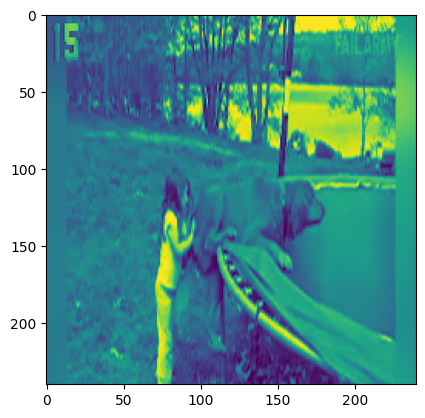

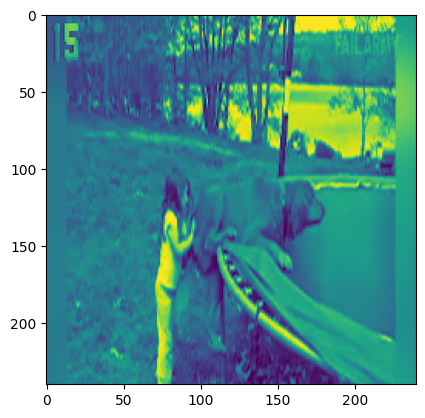

In [108]:
# prompt: render a frame from the tensor of video to matplotlib

import matplotlib.pyplot as plt
import torch

# Convert the tensor to an image
image = test_video_tensor_2[24]
test_video_tensor_3 = grayscale_video(test_video_tensor_2)
test_video_tensor_4 = reshape_video(test_video_tensor_3, (240, 240))

image = test_video_tensor_4[24]
# Display the image
plt.imshow(image)
plt.show()

# Display the image
plt.imshow(image)
plt.show()


In [109]:
test_video_tensor_4.shape

(25, 240, 240, 1)

In [124]:
test_path = '/content/test2'

In [125]:
def save_video(video_tensor, path, video_name):
  if not os.path.exists(path):
    os.makedirs(path)
  for i in range(video_tensor.shape[0]):
    image = video_tensor[i]
    save_path = path + '/' + video_name + '_' + str(i) + '.png'
    # print(save_path)
    cv2.imwrite(save_path, image)
# def save_labels(video_tensor, path, video_name):



In [177]:
save_path = '/content/onedrive/General/Video Folder/trial1'

In [178]:
save_video(test_video_tensor_4, save_path, 'test')

/content/onedrive/General/Video Folder/trial1/test_0.png
/content/onedrive/General/Video Folder/trial1/test_1.png
/content/onedrive/General/Video Folder/trial1/test_2.png
/content/onedrive/General/Video Folder/trial1/test_3.png
/content/onedrive/General/Video Folder/trial1/test_4.png
/content/onedrive/General/Video Folder/trial1/test_5.png
/content/onedrive/General/Video Folder/trial1/test_6.png
/content/onedrive/General/Video Folder/trial1/test_7.png
/content/onedrive/General/Video Folder/trial1/test_8.png
/content/onedrive/General/Video Folder/trial1/test_9.png
/content/onedrive/General/Video Folder/trial1/test_10.png
/content/onedrive/General/Video Folder/trial1/test_11.png
/content/onedrive/General/Video Folder/trial1/test_12.png
/content/onedrive/General/Video Folder/trial1/test_13.png
/content/onedrive/General/Video Folder/trial1/test_14.png
/content/onedrive/General/Video Folder/trial1/test_15.png
/content/onedrive/General/Video Folder/trial1/test_16.png
/content/onedrive/Genera

In [ ]:
def process_video(video_path):
  video_tensor = []
  video_timestamps = []

In [173]:
def process_dataset(data_path, json_file):
  json_path = os.path.join(data_path, json_file)
  videos = json.load(open(json_path))
  print(videos.keys())
  for video in videos.keys():
    category = videos[video]['category']
    label = videos[video]['label']
    video_path = os.path.join(data_path, category, label, video, '.mp4')

    print(video_path)



In [174]:
data_path = '/content/onedrive/General/Video Folder/video_small'
json_file = 'smaller_transition_times.json'

In [175]:
path_to_data = "/content/onedrive/General/Video Folder/video_small"
info_json_path = os.path.join(path_to_data, "small_transition_times.json")

In [176]:
process_dataset(data_path, json_file)

dict_keys(['25 Best Trampoline Fail Nominees - FailArmy Hall of Fame (July 2017)18', '28 Best Skateboard Fail Nominees - FailArmy Hall of Fame (August 2017)18', '29 Best Work Fail Nominees - FailArmy Hall of Fame (August 2017)1', '34 Workout Fail Nominees - FailArmy Hall Of Fame (April 2017)8', 'A Boatload of Fails - Throwback Fails (November 2017) _ FailArmy12', 'A Boatload of Fails - Throwback Fails (November 2017) _ FailArmy95', 'American Fails (July 2017) _ FailArmy37', 'Animals Can Be Jerks! (June 2018) _ FailArmy6', 'Armpit Wax - Fails You Missed (April 2018) _ 201825', 'Backflipping Bros - Fails of the Month! (May 2018) _ Failarmy14', 'Backflipping Bros - Fails of the Month! (May 2018) _ Failarmy17', 'Backflipping Bros - Fails of the Month! (May 2018) _ Failarmy22', 'Backflipping Bros - Fails of the Month! (May 2018) _ Failarmy42', 'Backflipping Bros - Fails of the Month! (May 2018) _ Failarmy5', 'Basketball Fails - March Madness! (March 2017) _ FailArmy25', 'Basketball Fails - 

In [147]:
def import_dataset(path_to_dataset):
  path_to_data = path_to_dataset
  info_json_path = os.path.join(path_to_data, "small_transition_times.json")
  info_json = json.load(open(info_json_path))
  print(info_json)

In [148]:
import_dataset(data_path)

{'25 Best Trampoline Fail Nominees - FailArmy Hall of Fame (July 2017)18': {'t': [-1.0, -1.0, -1.0], 'len': 8.0, 'rel_t': [-0.125, -0.125, -0.125], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}, '28 Best Skateboard Fail Nominees - FailArmy Hall of Fame (August 2017)18': {'t': [-1.0, -1.0, -1.0], 'len': 5.25, 'rel_t': [-0.19047619047619047, -0.19047619047619047, -0.19047619047619047], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}, '29 Best Work Fail Nominees - FailArmy Hall of Fame (August 2017)1': {'t': [-1.0, -1.0, -1.0], 'len': 5.0, 'rel_t': [-0.2, -0.2, -0.2], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train', 'label': 'no_oops'}, '34 Workout Fail Nominees - FailArmy Hall Of Fame (April 2017)8': {'t': [-1.0, -1.0, -1.0], 'len': 5.375, 'rel_t': [-0.18604651162790697, -0.18604651162790697, -0.18604651162790697], 'stdev': 0.0, 'rel_stdev': 0.0, 'n_notfound': 3, 'category': 'train'

In [72]:
# TODO
# [x] Modify dataloader instructions to SharePoint
# [ ] Trim all video to first 5 seconds
#     [x] Function to trim 5 5 seconds
# [ ] Downsample to 5fps -> total frames should be 25
#     [x] Function to downsample
# [ ] Put videos as 240p 320 x 240 or 426 x 240
#     [x] Function to reshape
# opencv2 to reshape to downsample
# [ ] square if need be
# [ ] Turn into filename_frame_num images & label csv
#   Train and Test image dirs
# Train 347 no_oops 668 oops / Test 70 no_oops 140 oops
# Cross validation <- look into this
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
# https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

In [73]:
# https://discuss.pytorch.org/t/best-and-most-efficient-way-to-do-a-videodataset/125551